# Tracking Near-Earth Objects (NEOs): Exploratory Data Analysis and Random Forest Classification

## Introduction:

Near-Earth Objects are celestial bodies such as asteriods and comets that pass close to Earth's orbit. While many of these objects are harmless, some of them can pose potential threat, which makes it essential to monitor and analyze these NEOs and their characteristics. The Near-Earth Object Web Service (NeoWs), NASA provides detailed information on objects that come close to the Earth's orbit. This enables researchers to assess their behaviour and any potential threat that they pose. This project delves into Exploratory data analysis (EDA) and hypothesis testing to better understand the factors tha affect the hazardousness of these objects.

## Question: 
How can we predict and classify potentially hazardous Near-Earth Objects (NEOs) based on their key characteristics?
## Objective:<br/>
The pimary objective of the project is to:<br/>
    1. Analyse the relationship between key characteristics of NEOs, such as their size, relative velocity and hazardous classification.<br/>
    2. Identify clusters or patterns within the dataset on the basis of the key features.<br/>
    3. Build predictive model to identify potentially hazardous NEOs using their defining attributes.<br/>


## Data Collection: 
For this project, I obtained a dataset from NASA that provides detailed information about the NEOs and their approximate distance from Earth. The data is extracted via the NASA API for the year of 2023. Due to the API's 7 days data fetch limit, the data is collected in separate chunks, each corresponding to 7-day period in the year of 2023. These chunks are then, merged to form a complete dataset for the entire year of 2023.

Source: NASA Asteroids NeoWs (Near Earth Object Web Service)
Time Period: 1st January 2023 to 31st December 2023

###Importing the libraries

Below are all the libraries that are imported and used for the entirety of the analysis. The libraries are essential for the data extraction, preprocessing, modelling and evaluating the model.


In [1]:
import requests  # Import the requests module to make HTTP requests
import json      # Import the json module to handle JSON data
import pandas as pd
import datetime 
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import statistics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# NASA API Key
api_key = '43CeF9mMNkbz8M1IhqOEYi3ici40QBdXXT2IXwMX'

# Function to make a request to the NASA API and fetch the data
def get_nasa_data(start_date, end_date, api_key):
    try:
        # Base URL for NASA's API
        base_url = "https://api.nasa.gov/neo/rest/v1/feed"
        # Make the GET request to the NASA API with the specified parameters (date range and API key)
        request = requests.get(base_url, params={'start_date': start_date, 'end_date': end_date, 'api_key': api_key})

        # Check if the request was successful (status code 200)
        if request.status_code == 200:
           return request.json()  # Return the data as JSON
        else:
            print(f"data wasn't fetched for {start_date} to {end_date}, Status Code: {request.status_code}")
            return None
    except:
        print(f"An error occurred")
        return None

In [3]:
date_ranges = [
    ("2023-01-01", "2023-01-07"), ("2023-01-08", "2023-01-14"), ("2023-01-15", "2023-01-21"),
    ("2023-01-22", "2023-01-28"), ("2023-01-29", "2023-02-04"), ("2023-02-05", "2023-02-11"),
    ("2023-02-12", "2023-02-18"), ("2023-02-19", "2023-02-25"), ("2023-02-26", "2023-03-04"),
    ("2023-03-05", "2023-03-11"), ("2023-03-12", "2023-03-18"), ("2023-03-19", "2023-03-25"),
    ("2023-03-26", "2023-04-01"), ("2023-04-02", "2023-04-08"), ("2023-04-09", "2023-04-15"),
    ("2023-04-16", "2023-04-22"), ("2023-04-23", "2023-04-29"), ("2023-04-30", "2023-05-06"),
    ("2023-05-07", "2023-05-13"), ("2023-05-14", "2023-05-20"), ("2023-05-21", "2023-05-27"),
    ("2023-05-28", "2023-06-03"), ("2023-06-04", "2023-06-10"), ("2023-06-11", "2023-06-17"),
    ("2023-06-18", "2023-06-24"), ("2023-06-25", "2023-07-01"), ("2023-07-02", "2023-07-08"),
    ("2023-07-09", "2023-07-15"), ("2023-07-16", "2023-07-22"), ("2023-07-23", "2023-07-29"),
    ("2023-07-30", "2023-08-05"), ("2023-08-06", "2023-08-12"), ("2023-08-13", "2023-08-19"),
    ("2023-08-20", "2023-08-26"), ("2023-08-27", "2023-09-02"), ("2023-09-03", "2023-09-09"),
    ("2023-09-10", "2023-09-16"), ("2023-09-17", "2023-09-23"), ("2023-09-24", "2023-09-30"),
    ("2023-10-01", "2023-10-07"), ("2023-10-08", "2023-10-14"), ("2023-10-15", "2023-10-21"),
    ("2023-10-22", "2023-10-28"), ("2023-10-29", "2023-11-04"), ("2023-11-05", "2023-11-11"),
    ("2023-11-12", "2023-11-18"), ("2023-11-19", "2023-11-25"), ("2023-11-26", "2023-12-02"),
    ("2023-12-03", "2023-12-09"), ("2023-12-10", "2023-12-16"), ("2023-12-17", "2023-12-23"),
    ("2023-12-24", "2023-12-30"), ("2023-12-31", "2023-12-31")
]


# Initialize an empty list to hold the combined data for all 4 weeks
neo_data = []

# Loop through each date range, fetch the data and append it to the list
for start_date, end_date in date_ranges:
    data = get_nasa_data(start_date, end_date, api_key)
    if data:
        neo_data.append(data)  # Append data if fetched successfully
    else:
        print(f"No data found for {start_date} to {end_date}")

# Check if neo_data is not empty and then turn it into dataframe using pandas library
if neo_data:
    neo_df = pd.DataFrame(neo_data)
else:
    print("No data was retrieved for the given date ranges.")


neo_df.head()
print(neo_df['near_earth_objects'])


0     {'2023-01-01': [{'links': {'self': 'http://api...
1     {'2023-01-11': [{'links': {'self': 'http://api...
2     {'2023-01-20': [{'links': {'self': 'http://api...
3     {'2023-01-22': [{'links': {'self': 'http://api...
4     {'2023-01-30': [{'links': {'self': 'http://api...
5     {'2023-02-11': [{'links': {'self': 'http://api...
6     {'2023-02-13': [{'links': {'self': 'http://api...
7     {'2023-02-20': [{'links': {'self': 'http://api...
8     {'2023-03-03': [{'links': {'self': 'http://api...
9     {'2023-03-10': [{'links': {'self': 'http://api...
10    {'2023-03-14': [{'links': {'self': 'http://api...
11    {'2023-03-21': [{'links': {'self': 'http://api...
12    {'2023-04-01': [{'links': {'self': 'http://api...
13    {'2023-04-02': [{'links': {'self': 'http://api...
14    {'2023-04-12': [{'links': {'self': 'http://api...
15    {'2023-04-20': [{'links': {'self': 'http://api...
16    {'2023-04-23': [{'links': {'self': 'http://api...
17    {'2023-05-02': [{'links': {'self': 'http:/

The collected data includes information such as - 
* Links to more detailed information
* information about each NEO
* element count for NEO in each 7-day period 

## Data Extraction and Transformation for NEOs
Now that, I have extracted the data from the NASA API and collected all the 4 weeks of data, I will tranform the raw JSON data into a structured format using Python's `pandas` library. The goal is to extract the key details about the NEOs (Near Earth Objects) and use them as variables.
The key variables chosen here are:
1. `id`: a unique identifier for each NEO
2. `name`: the name of the NEO
3. `absolute_magnitude_h`: the brightness of the NEO, which is an indicator of its size and reflectivity. The absolute magnitude H is a measure of the asteroid’s intrinsic mean brightness, estimated from measurements of its apparent magnitudes at the various times it has been observed, at various distances from the Sun and Earth, and at various phase angles. Also, since the actual shape of the asteroid is usually unknown, it is simply assumed to be spherical.
4. `estimated_diameter_min_km` & `estimated_diameter_max_km`: the minimun and maximum diameter of the NEO in kilometers.
5. `is_potentially_hazardous_asteroid`: the boolean value indicating whether the NEO is potentially hazardous or not.
6. `close_approach_date`: the date when the NEO makes its closest approach to the planet Earth. 
7. `miss_distance`: the distance between the NEO and Earth when the object makes its closest approach to Earth.
8. `relative_velocity`: the velocity of NEO relative to Earth during its closest approach.
9. `orbiting_body`: the celestial body that the NEO is orbiting, in this case it is planet Earth.
10. `is_sentry_object`: the boolean value indicating whether the object is monitored by NASA's Sentry System.

In [4]:
"""
extract the 'near_earth_objects' data to form the dataframe
"""

#initialize the neo_df as empty list to store the new data
df =[]

# create a loop through the NEO data
for each_week in neo_df['near_earth_objects']:
    for date, objects in each_week.items():
        for neo in objects:
            df.append({
                'Date': date, 'ID': neo['id'], 'Name': neo['name'], 'Abs_magnitude': neo['absolute_magnitude_h'], 'Min_diameter': neo['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'Max_diameter': neo['estimated_diameter']['kilometers']['estimated_diameter_max'], 'Potential_hazard': neo['is_potentially_hazardous_asteroid'], 
                'Close_approach_date': neo['close_approach_data'][0]['close_approach_date'], 'Relative_velocity': neo['close_approach_data'][0]['relative_velocity']['kilometers_per_second'], 
                'Miss_distance': neo['close_approach_data'][0]['miss_distance']['astronomical'], 'Orbiting_body': neo['close_approach_data'][0]['orbiting_body'], 
                'Sentry_object': neo['is_sentry_object']
            })

df = pd.DataFrame(df)
print(df.head())


         Date       ID               Name  Abs_magnitude  Min_diameter  \
0  2023-01-01  2154347  154347 (2002 XK4)          16.08      1.616423   
1  2023-01-01  2385186  385186 (1994 AW1)          17.64      0.788052   
2  2023-01-01  2453309  453309 (2008 VQ4)          19.51      0.333085   
3  2023-01-01  3683468       (2014 QR295)          18.39      0.557898   
4  2023-01-01  3703782        (2015 AE45)          25.30      0.023150   

   Max_diameter  Potential_hazard Close_approach_date Relative_velocity  \
0      3.614431             False          2023-01-01     27.3921993676   
1      1.762138              True          2023-01-01     12.9241938417   
2      0.744801             False          2023-01-01       5.822172435   
3      1.247498             False          2023-01-01     16.1804693508   
4      0.051765             False          2023-01-01      6.8621510862   

  Miss_distance Orbiting_body  Sentry_object  
0  0.3312263376         Earth          False  
1  0.22328

Saving the data extracted into a csv file

In [5]:
df.to_csv('NEOs.csv')

## Data Preparation and Cleaning

### Handling the missing values 
Once we have converted the data into a dataframe, next we check for any missing values and the ways to address the issue.
Since, there are no missing values in the dataset, we can move ahead to other aspects of the data preparation.

In [6]:
# checking for any missing values in the dataframe
df.isnull().sum()

Date                   0
ID                     0
Name                   0
Abs_magnitude          0
Min_diameter           0
Max_diameter           0
Potential_hazard       0
Close_approach_date    0
Relative_velocity      0
Miss_distance          0
Orbiting_body          0
Sentry_object          0
dtype: int64

To ensure there are no mission values, we use:  

In [7]:
assert pd.notnull(df).all().all()

### Enriching the data 
To enrich the dataset by performing the following steps:

**Parsing Dates**:<br/>
The dates columns - `Date` and `Close_approach_date` are currently stored as strings. Now, we'll convert it into `datetime` object for better analysis.
**Extracting Data Features**:<be/>
The following are the additional features that we are adding into the dataframe-<br/>
    1. Relative Velocity (in km/s): `Relative_velocity_km_s`


### Parsing Dates
To convert `Date` and `Close_approach_date` columns into `datetime` format, we use `pd.to_datetime()

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Close_approach_date'] = pd.to_datetime(df['Close_approach_date'])

### Data Feature Engineering
In this step, we create new features to further enhance our analysis. The following features are derived from the existing columns and provide more details about the NEOs.
1. Date-based features: from the parsed dates, we derive the following 2 additional attributes:
    - Year: The year in which the NEO was observed.
    - Month: The month of observation, which is useful for identifying seasonal trends.
2. Relative Velocity (in km/s): this feature represents the relative velocity in kilometer/second. Doing so is essential since it is the standard unit for measuring speed in space and makes it easier to interpret the results.

In [9]:
# Year and month from  parsed dates
df['Year'] = df['Close_approach_date'].dt.year
df['Month'] = df['Close_approach_date'].dt.month

df['Relative_velocity'] = pd.to_numeric(df['Relative_velocity'], errors='coerce')
df['Relative_velocity_km_s'] = df['Relative_velocity'] / 3600

The first few rows after processing:

In [10]:
df.head()

,Date,ID,Name,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Relative_velocity,Miss_distance,Orbiting_body,Sentry_object,Year,Month,Relative_velocity_km_s
0,2023-01-01,2154347,154347 (2002 XK4),16.08,1.616423,3.614431,False,2023-01-01,27.392199,0.3312263376,Earth,False,2023,1,0.007609
1,2023-01-01,2385186,385186 (1994 AW1),17.64,0.788052,1.762138,True,2023-01-01,12.924194,0.2232885314,Earth,False,2023,1,0.003590
2,2023-01-01,2453309,453309 (2008 VQ4),19.51,0.333085,0.744801,False,2023-01-01,5.822172,0.2644821197,Earth,False,2023,1,0.001617
3,2023-01-01,3683468,(2014 QR295),18.39,0.557898,1.247498,False,2023-01-01,16.180469,0.2629103243,Earth,False,2023,1,0.004495
4,2023-01-01,3703782,(2015 AE45),25.30,0.023150,0.051765,False,2023-01-01,6.862151,0.0569979859,Earth,False,2023,1,0.001906


In [11]:
df.tail()

,Date,ID,Name,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Relative_velocity,Miss_distance,Orbiting_body,Sentry_object,Year,Month,Relative_velocity_km_s
7341,2023-12-31,54420282,(2024 AA4),20.32,0.229380,0.512909,True,2023-12-31,22.614793,0.2431986615,Earth,False,2023,12,0.006282
7342,2023-12-31,54448115,(2024 MD),28.00,0.006677,0.014929,False,2023-12-31,7.001434,0.2338580171,Earth,True,2023,12,0.001945
7343,2023-12-31,54456238,(2024 MZ1),23.69,0.048591,0.108653,False,2023-12-31,10.633127,0.2967107436,Earth,False,2023,12,0.002954
7344,2023-12-31,54469547,(2024 RT9),21.74,0.119277,0.266710,False,2023-12-31,12.155930,0.1486521451,Earth,False,2023,12,0.003377
7345,2023-12-31,54481742,(2024 SJ1),26.71,0.012094,0.027042,False,2023-12-31,11.689651,0.3723058765,Earth,False,2023,12,0.003247


### Exploratory Data Analysis (EDA)

EDA is a crucial step in data analysis, which helps in finding out the data structure, patterns and relationships between the variables. To do so, we perform various tasks like summarizing the variables, visualizing the data and identifying any outliers present in the data.


**Shape of the data**

In [12]:
print(df.shape)

(7346, 15)


**Interpretation**
We can see that the dataset has 7349 rows and 15 columns.

**Data Information**<br/>
Checking the data types and the non-null counts

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7346 entries, 0 to 7345
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    7346 non-null   datetime64[ns]
 1   ID                      7346 non-null   object        
 2   Name                    7346 non-null   object        
 3   Abs_magnitude           7346 non-null   float64       
 4   Min_diameter            7346 non-null   float64       
 5   Max_diameter            7346 non-null   float64       
 6   Potential_hazard        7346 non-null   bool          
 7   Close_approach_date     7346 non-null   datetime64[ns]
 8   Relative_velocity       7346 non-null   float64       
 9   Miss_distance           7346 non-null   object        
 10  Orbiting_body           7346 non-null   object        
 11  Sentry_object           7346 non-null   bool          
 12  Year                    7346 non-null   int32   

**Interpretation**:<br/>
We can see the data types of all the columns as well as the features engineered by us.
The column `Miss_distance` have the data type as object. We need to convert it into float data type.

In [14]:
df['Miss_distance'] = df['Miss_distance'].astype(float)

### Dropping Unneccessary Columns<br/>
Removing columns that are no longer needed, like `Name`, `Orbiting_body`, `Relative_velocity`, `Date`.<br/>

The above columns are removed due to the following reason -<br/>

`Name`: this column contains a unique name of the NEO, which is not relevant to the analysis. The ID column does the same, so there is no need for name.<br/>
`Orbiting_body`: this column says the celestial body the NEO is orbiting. Since in our case all NEOs are orbiting Earth, the column is reduntant and hence removed.<br/>
`Relative_velocity`: this column contains the relative velocity of each NEO in the unit of kilometer per hour. As we converted the relative velocity to kilometer per second, there is no need for this column.<br/>
`Date`: the date column is removed as we extracted the date the relevant features like year and month from the `Close_approach_date`.<br/>

In [15]:
df = df.drop(['Name', 'Orbiting_body', 'Relative_velocity', 'Date'], axis = 1)
df.head()

,ID,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Miss_distance,Sentry_object,Year,Month,Relative_velocity_km_s
0,2154347,16.08,1.616423,3.614431,False,2023-01-01,0.331226,False,2023,1,0.007609
1,2385186,17.64,0.788052,1.762138,True,2023-01-01,0.223289,False,2023,1,0.003590
2,2453309,19.51,0.333085,0.744801,False,2023-01-01,0.264482,False,2023,1,0.001617
3,3683468,18.39,0.557898,1.247498,False,2023-01-01,0.262910,False,2023,1,0.004495
4,3703782,25.30,0.023150,0.051765,False,2023-01-01,0.056998,False,2023,1,0.001906


**Descriptive Statistics**

In [16]:
df.describe()

,Abs_magnitude,Min_diameter,Max_diameter,Close_approach_date,Miss_distance,Year,Month,Relative_velocity_km_s
count,7346.000000,7346.000000,7346.000000,7346,7346.000000,7346.0,7346.000000,7346.000000
mean,24.197526,0.089029,0.199076,2023-07-09 16:59:19.814865152,0.211532,2023.0,6.776749,0.003481
min,14.640000,0.000818,0.001828,2023-01-01 00:00:00,0.000067,2023.0,1.000000,0.000092
25%,22.360000,0.015508,0.034677,2023-04-06 00:00:00,0.059418,2023.0,4.000000,0.002104
50%,24.440000,0.034400,0.076920,2023-07-19 00:00:00,0.200255,2023.0,7.000000,0.003131
75%,26.170000,0.089651,0.200466,2023-10-11 00:00:00,0.345614,2023.0,10.000000,0.004546
max,32.560000,3.137292,7.015199,2023-12-31 00:00:00,0.499906,2023.0,12.000000,0.012730
std,2.717275,0.167346,0.374197,NaN,0.155208,0.0,3.467791,0.001863


**Interpretation**

- `Abs_magnitude`:  
  The absolute magnitude (intrinsic brightness) ranges from **14.64** to **32.56**, with a mean of **24.19**.  
  - The lower the magnitude, the brighter and larger the NEOs are.  
  - The data is spread among both smaller and larger objects due to the standard deviation being significantly large.

- `Min_diameter`:  
  The minimum diameter of NEOs varies from **0.000818 km** to **3.137 km**, with a mean of **0.0891 km**.  
  - This indicates a wide range in the size of NEOs.

- `Max_diameter`:  
  The maximum diameter ranges from **0.00182 km** to **7.015 km**, with a mean of **0.199 km**.  
  - There's a significant variation in NEO sizes, suggesting that the data is wide spread.

- `Close_approach_date`:  
  The close approach dates span from **1st January, 2023**, to **31 December, 2023**, indicating data from a **1 year period**.

- `Miss_distance`:  
  The closest approach distance ranges from **0.000067 AU** (extremely close) to **0.499x AU** (relatively far).  
  - The average miss distance is **0.218 AU**, indicating that most NEOs pass at safe distances, but there are some closer passes as well.

- `Relative_velocity_km_s`:
  The minimum velocity is **0.000092 km/s** and the maximum velocity is **0.012730 km/s**, with an average velocity of **0.003482 km/s**.
  - This indicates that most NEOs are moving relatively slowly.
  - The standard deviation is **0.001863** which means that the velocities are tightly clustered around the mean i.e. **0.003482 km/s**.


In [17]:
df.describe(include=('object','bool'))

,ID,Potential_hazard,Sentry_object
count,7346,7346,7346
unique,6497,2,2
top,54465210,False,False
freq,3,6886,6927


Distribution plot for `Potential_hazard` column

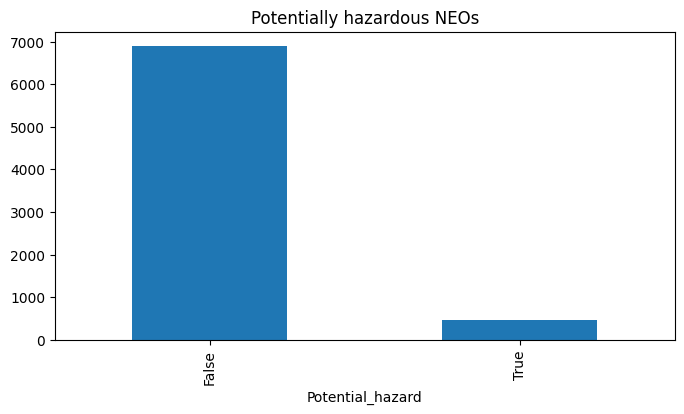

In [18]:
# plot distribution of Hazardous
plt.figure(figsize=(8,4))
df.Potential_hazard.value_counts().plot(kind='bar')
plt.title('Potentially hazardous NEOs')
plt.show()

**Interpretation**

The bar graph shows the distribution of the `Potential_hazard` column. The two categories are True and False, where True is the NEO that pose potential hazard to Earth and False are the non-hazardeous NEOs.
As seen in the graph, there is an imbalance in the dataset. This imbalance can impact the ability of any predictive model to accurately predict events, therefore, the imbalance is dealed with later in the analysis.

**Monthly Trend Analysis**

Extracting the year and the month from the `Close_approach_date` and creating a bar graph showing the sum of `Potential_hazard` for each month.

<Axes: title={'center': 'Monthly trend in NEOs throughout the year'}, xlabel='Month'>

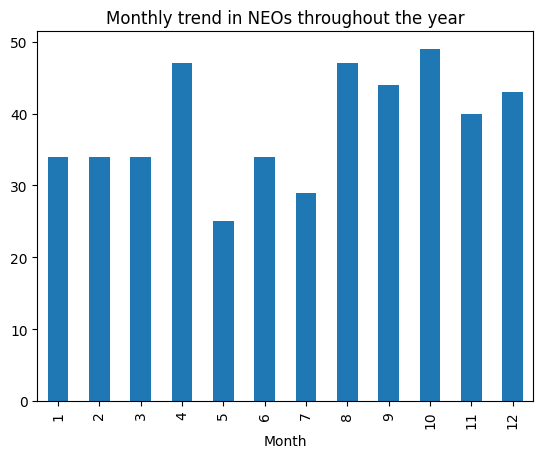

In [19]:
# Year and month from  parsed dates
df['Year'] = df['Close_approach_date'].dt.year
df['Month'] = df['Close_approach_date'].dt.month

# Example: Check for trends over months
df.groupby('Month')['Potential_hazard'].sum().plot(kind='bar', title='Monthly trend in NEOs throughout the year')

**Interpretation**
The graph shows the distribution of the number of potentially hazardous NEOs across the year. The graph shows no indication of any seasonal patterns or trends.

### Identify The Outliers Using Z-Score

To find the outliers in the dataset, we first filter out the numeric variables from the dataset.<br/>
In this case, the following columns are used:<br/>
`Abs_magnitude`, `Miss_distance`, `Min_diameter`, `Max_diameter`, `Relative_velocity_km_s`.<br/>
We use **Z-Score** to identify these outliers. A Z-Score measures how far a data point is from the mean in terms of standard deviation. It helps in standardizing the data and making it easier to identify outliers.<br/>
The formula for Z-Score is:<br/>
$$
Z = \frac{X - \mu}{\sigma}
$$
where:<br/>
$ X $ is the data value<br/>
$ \mu $  is the mean<br/>
$ \sigma $ is the standard deviation<br/>

The values with the Z-Score, $|Z| > 3$ are considered to be outliers since they deviate significantly from the mean of the data.<br/>
The outliers are then flagged and printed by using `outlier_mask` variable which filters out any values whose Z-Score exceeds the threshold.

In [20]:
num_df = df.filter(['Abs_magnitude', 'Miss_distance', 'Min_diameter', 'Max_diameter', 'Relative_velocity_km_s'], axis=1)
z_scores = zscore(df.filter(['Abs_magnitude', 'Miss_distance', 'Min_diameter', 'Max_diameter', 'Relative_velocity_km_s'], axis=1))
outlier_threshold = 3.0
outliers_mask = np.abs(z_scores) > outlier_threshold

print(num_df[outliers_mask.any(axis=1)])

      Abs_magnitude  Miss_distance  Min_diameter  Max_diameter  \
0             16.08       0.331226      1.616423      3.614431   
1             17.64       0.223289      0.788052      1.762138   
34            21.49       0.498085      0.133830      0.299254   
67            20.10       0.492122      0.253837      0.567597   
128           18.09       0.378900      0.640553      1.432320   
...             ...            ...           ...           ...   
7042          19.60       0.204952      0.319562      0.714562   
7052          19.64       0.204952      0.313729      0.701520   
7113          20.01       0.376393      0.264579      0.591616   
7160          21.14       0.078353      0.157237      0.351593   
7164          18.02       0.359449      0.661538      1.479245   

      Relative_velocity_km_s  
0                   0.007609  
1                   0.003590  
34                  0.009213  
67                  0.009441  
128                 0.002523  
...                  

### Visualizing Distribution and Identifying the Outliers

Next, we plot the numeric columns as **histograms** and **box plots**.<br/>
Histograms provide an overview of the frequency of the values, across the range of each variable. Meanwhile, boxplot shows a clear visualization of outliers that may be present in the dataset, as points outside the whiskers.

**Histograms of Numeric Columns:**

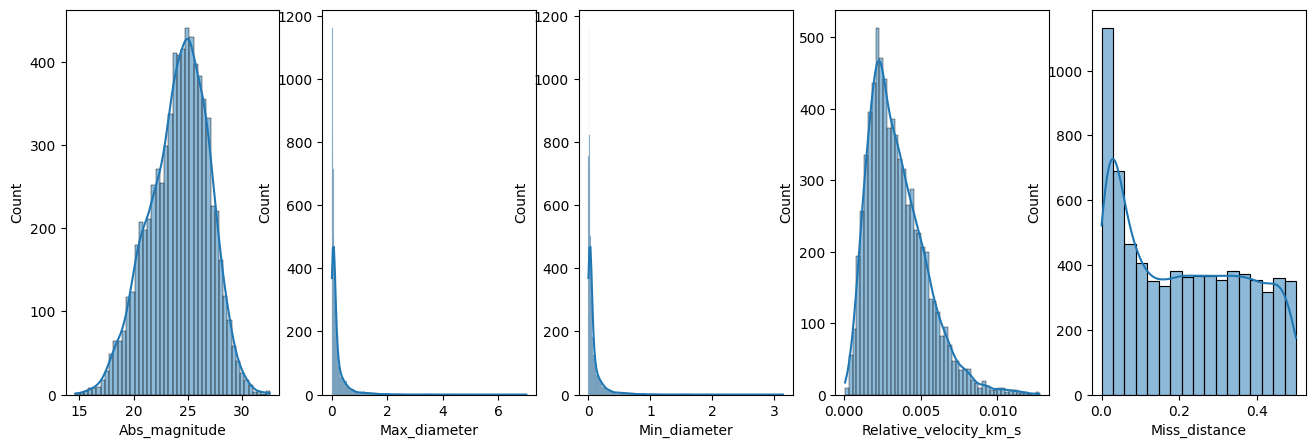

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,5,1)
sns.histplot(df['Abs_magnitude'], kde=True)

plt.subplot(1,5,2)
sns.histplot(df['Max_diameter'], kde=True)

plt.subplot(1,5,3)
sns.histplot(df['Min_diameter'], kde=True)

plt.subplot(1,5,4)
sns.histplot(df['Relative_velocity_km_s'], kde=True)

plt.subplot(1,5,5)
sns.histplot(df['Miss_distance'], kde=True)

plt.show()

**Interpretation**

From the above histograms, we can see that:<br/>
- distribution of `Abs_magnitude` is Normal distribution, centered around 25. There is no significant skewness and potential outliers are not very evident from the histogram.<br/>
- the distributions of `Max_diameter` and `Min_diameter` are heavily right-skewed. The data points extend significantly towards larger diameter, suggesting presence of outliers.<br/>
- the distribution of `Relative_velocity_km_S`  is slightly right-skewed. The majority of velocities cluster around 0, with a tail extending towards the higher velocity range, indicating outliers.<br/>
- the distribution of `Miss_distance` is right-skewed. <br/>

**Boxplot of Numeric Columns**

<Axes: ylabel='Miss_distance'>

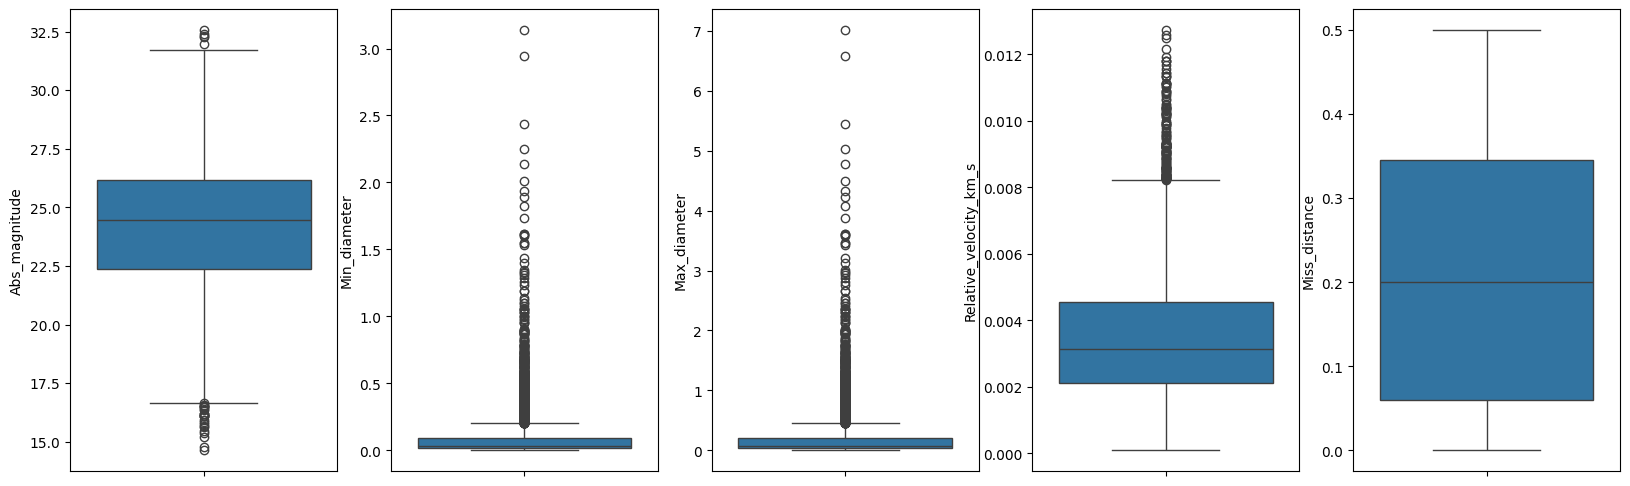

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,5,1)
sns.boxplot(df['Abs_magnitude'])

plt.subplot(1,5,2)
sns.boxplot(df['Min_diameter'])

plt.subplot(1,5,3)
sns.boxplot(df['Max_diameter'])

plt.subplot(1,5,4)
sns.boxplot(df['Relative_velocity_km_s'])

plt.subplot(1,5,5)
sns.boxplot(df['Miss_distance'])

**Interpretation**

From the above boxplots, we can clearly see the presence of outliers in almost all of the variables, except `Miss_distance`.<br/>
Variables like `Max_diameter`, `Min_diameter` and `Relative_velocity_km_s` display significant outliers above the upper whisker.

### Calculation of IQR and Handling Outliers
The **Interquartile Range** is a measure of statistical dispersion. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):<br/>
$$
IQR = Q3 - Q1
$$
where Q1 is the 25th percentile of the data and Q3 is the 75th percentile of the data.<br/>
To identify outliers, we calculate the lower bound and upper bound using the IQR:
$$
Lower Bound = Q1 - 1.5×IQR
$$
$$
Upper Bound=Q3+1.5×IQR
$$
The outliers are then handled by removing the extreme values that lie beyond the upper bound of the data.

In [23]:
percentile25 = df['Min_diameter'].quantile(0.25)
percentile75 = df['Max_diameter'].quantile(0.75)

iqr = percentile75 - percentile25
print(iqr)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

0.1849576848
Upper limit 0.47790218289999997
Lower limit -0.2619285563


Removing the outliers from the dataset

In [24]:
new_df = df[df['Max_diameter'] < upper_limit]

### Checking the shape of Cleaned Data

In [25]:
new_df.shape

(6596, 11)

### Visualization of Cleaned Data

The histograms and boxplots are plotted again using the cleaned data, to look at the distributions and see the difference in the dataset now.

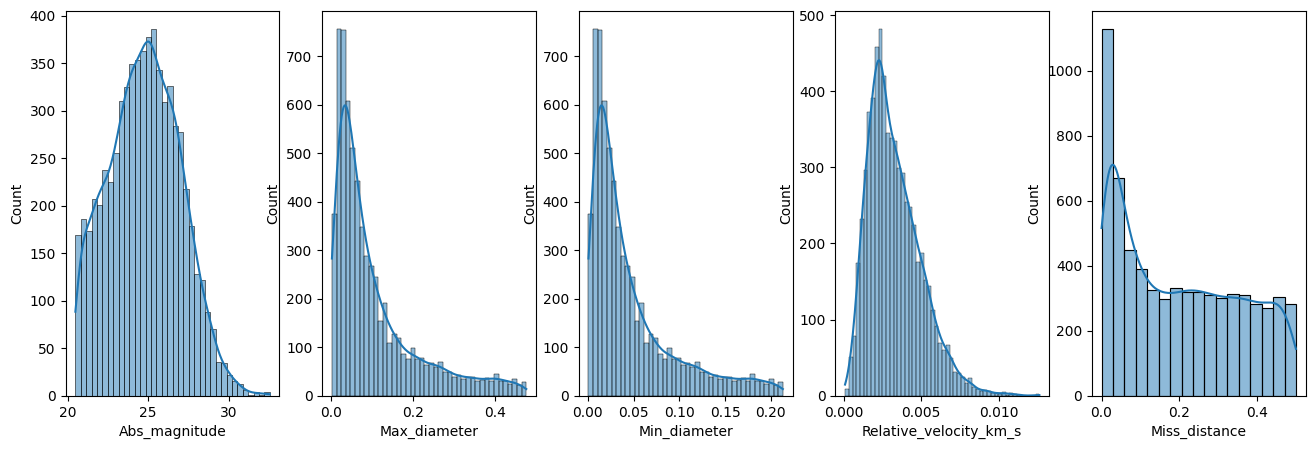

In [26]:
plt.figure(figsize=(16,5))
plt.subplot(1,5,1)
sns.histplot(new_df['Abs_magnitude'], kde=True)

plt.subplot(1,5,2)
sns.histplot(new_df['Max_diameter'], kde=True)

plt.subplot(1,5,3)
sns.histplot(new_df['Min_diameter'], kde=True)

plt.subplot(1,5,4)
sns.histplot(new_df['Relative_velocity_km_s'], kde=True)

plt.subplot(1,5,5)
sns.histplot(new_df['Miss_distance'], kde=True)

plt.show()

**Interpretation**
As we can see, the distributions of `Max_diameter` and `Min_diameter` is much more clearer. It is right-skewed.


<Axes: ylabel='Miss_distance'>

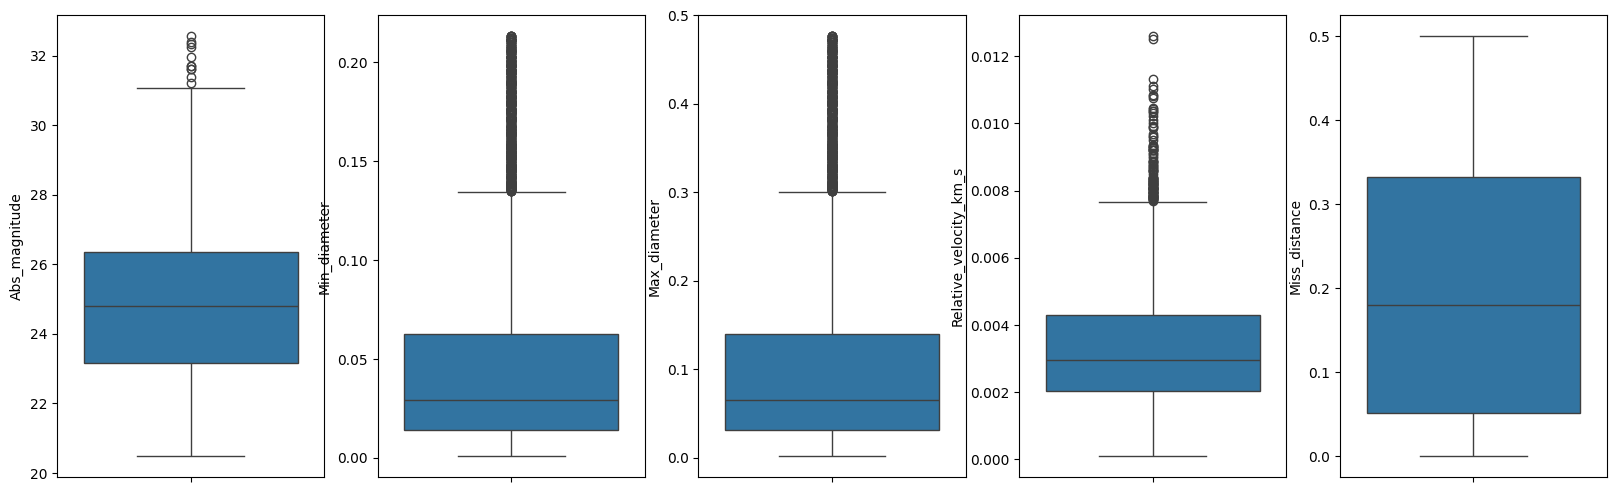

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(1,5,1)
sns.boxplot(new_df['Abs_magnitude'])

plt.subplot(1,5,2)
sns.boxplot(new_df['Min_diameter'])

plt.subplot(1,5,3)
sns.boxplot(new_df['Max_diameter'])

plt.subplot(1,5,4)
sns.boxplot(new_df['Relative_velocity_km_s'])

plt.subplot(1,5,5)
sns.boxplot(new_df['Miss_distance'])

**Interpretation**
Looking at the boxplots, we can see that the extreme outliers have been removed. Although, there are still outliers in the dataset, they aren't as extreme as before. The `Min_diameter` and `Max_diameter` are much more clearer and not distorted due to the outliers.

### Correlation Analysis of Data Columns

In [28]:
new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance']].corr()


,Relative_velocity_km_s,Abs_magnitude,Max_diameter,Min_diameter,Miss_distance
Relative_velocity_km_s,1.000000,-0.269719,0.284124,0.284124,0.28031
Abs_magnitude,-0.269719,1.000000,-0.878641,-0.878641,-0.27955
Max_diameter,0.284124,-0.878641,1.000000,1.000000,0.28895
Min_diameter,0.284124,-0.878641,1.000000,1.000000,0.28895
Miss_distance,0.280310,-0.279550,0.288950,0.288950,1.00000


**Interpretation**
* As we can see, the `Min_diameter` and `Max_diameter` have a strong negative correlation with the `Abs_magnitude`. This means as the absolute magnitude (a measure of brightness) increases, the size of the object decreases. Brighter objects tend to be larger.

*there is no significant correlation in other variables.

In [29]:
new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance']].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Relative_velocity_km_s,Abs_magnitude,Max_diameter,Min_diameter,Miss_distance
Relative_velocity_km_s,1.0,-0.2697,0.2841,0.2841,0.2803
Abs_magnitude,-0.2697,1.0,-0.8786,-0.8786,-0.2795
Max_diameter,0.2841,-0.8786,1.0,1.0,0.2889
Min_diameter,0.2841,-0.8786,1.0,1.0,0.2889
Miss_distance,0.2803,-0.2795,0.2889,0.2889,1.0


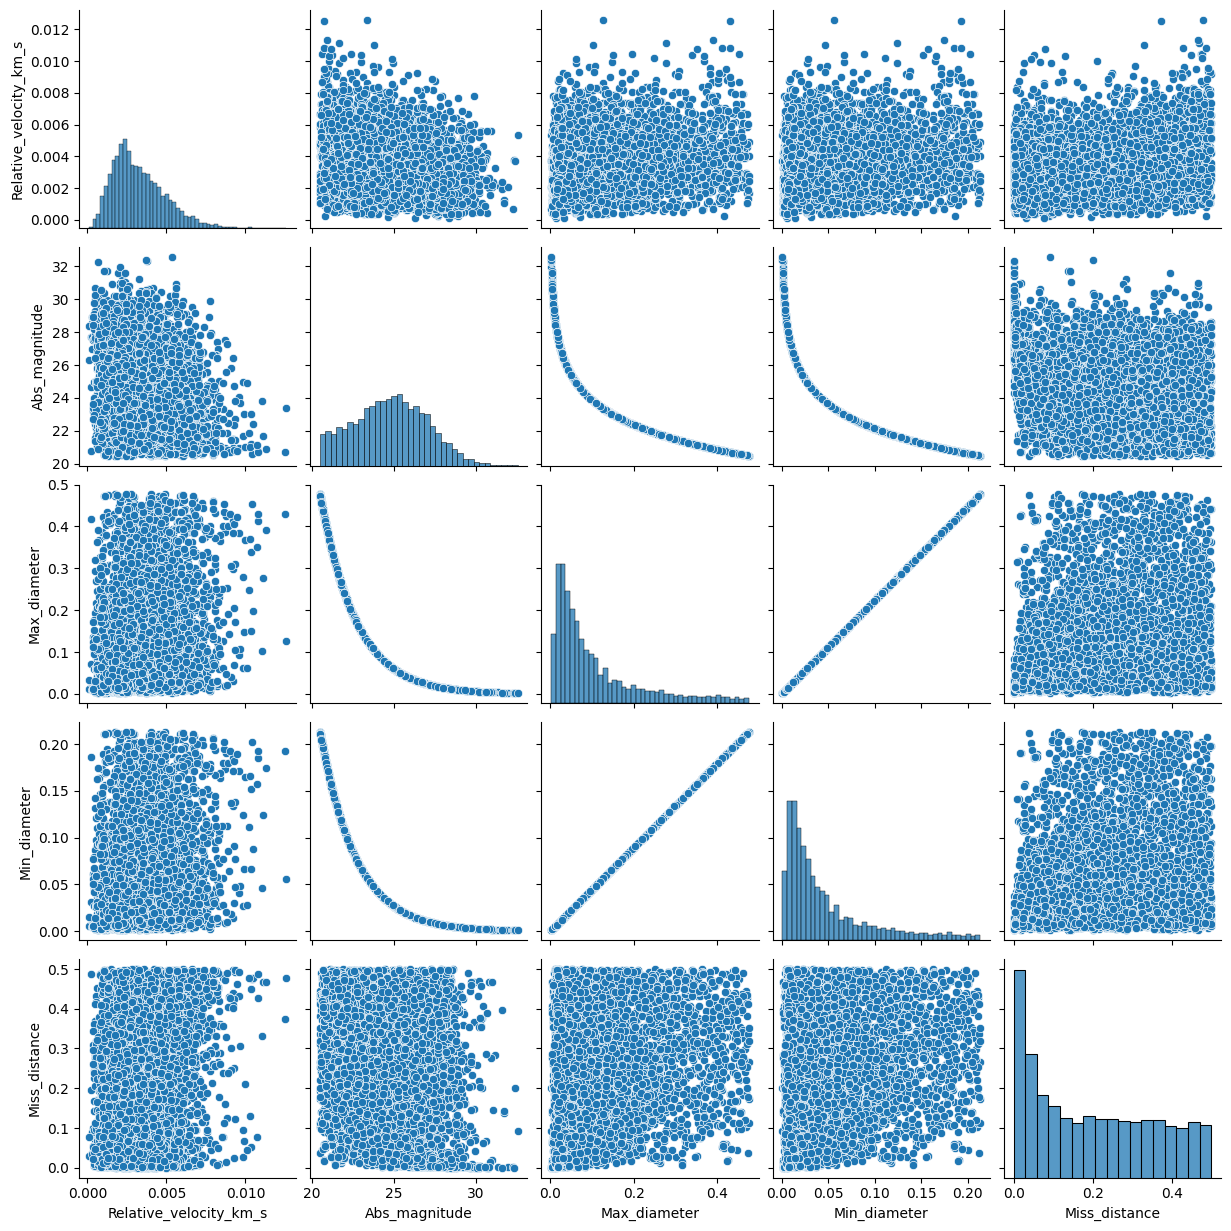

In [30]:
sns.pairplot(new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance']])
plt.show()

The pairplot shows the distribution of the dataset, as well as the spread of the data across the range of each variable.

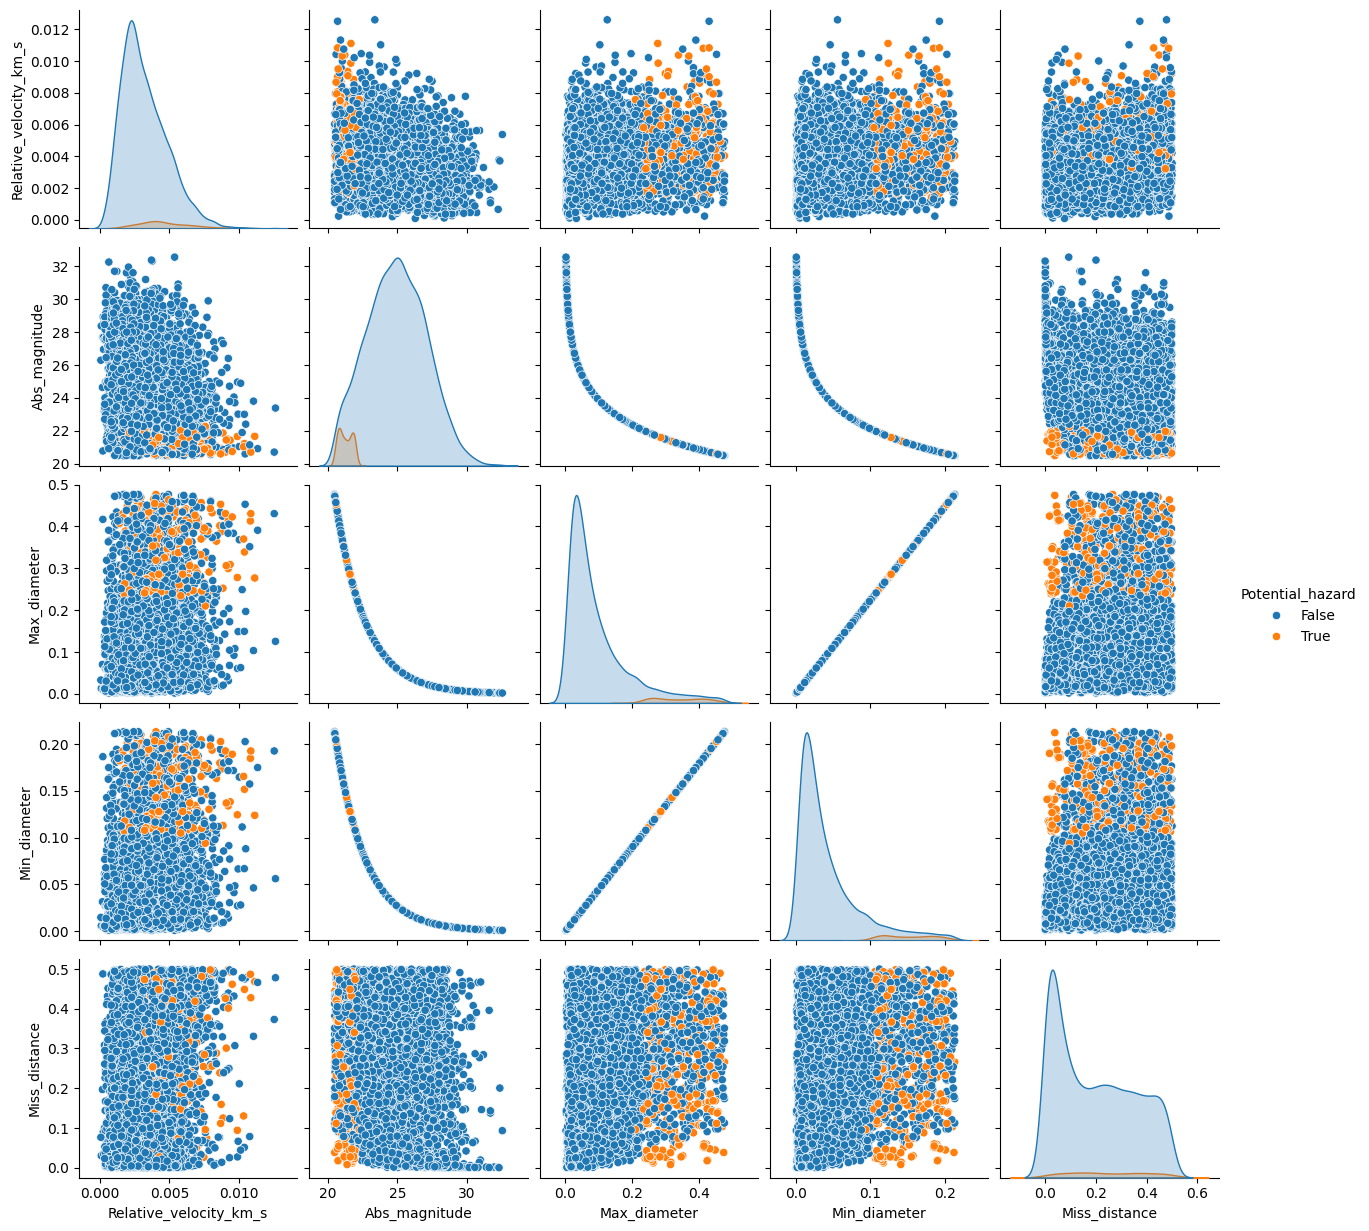

In [31]:
sns.pairplot(new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance','Potential_hazard']], hue="Potential_hazard")
plt.show()

This pairplor visualizes the relationships between the independent variables and the dependent variable. <br/>
Some interesting insights to note here are:<br/>
* Hazardous objects:<br/>
    - are predominantly found at smaller `Miss_distance` value.<br/>
    - tend to have lower `Abs_magnitude` and larger diameters.<br/>
    - no clear distinction is seen based on `Relative_velocity_km_s`.<br/>
* Non Hazardous objects:<br/>
    - distributed widely across all variables but are concentrated in the higher `Miss_distance` and smaller diameters.

## Random Forest Model Training and Evaluation
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that works by creating a multitude of decision trees during training. In this project, we are working with a classification problem where the goal is to predict whether an NEO is a potential hazard or not (binary classification: 0 for non-hazardous, 1 for hazardous).<br/>

###Point to note:
Although, we have removed the outliers from the data and cleaned it, we won't be using the cleaned data for creating the model. The reason for that is once the data is cleaned the outliers are removed however, that is also affecting the values of `Potential_hazard` and creating further disproportionality. Since the positive values in `Potential_hazard` are important for our analysis and these are the point of value that needs to be predicted by the model. Removing them could result in loss of valuable information.

### Encoding the features:

In this step, we are converting the `Potential_hazard` column and `Sentry_object` columns from boolean to binary (`1/0`) to help in easy processing while making machine learning models.

In [32]:
df['Potential_hazard'] = df['Potential_hazard'].astype(int)
df['Sentry_object'] = df['Sentry_object'].astype(int)

### Spliting the data using Stratified Sampling

Before splitting, we notice the distribution of `Potential_hazard` is 93.74% non-hazardous and 6.26% hazardous. This indicates a highly imbalanced dataset, which has to be considered during model evaluation.

Stratified sampling is used here to make sure the same class proportion in training and test datasets as it is in the original dataset.

In [33]:
df['Potential_hazard'].value_counts(normalize=True)*100

Potential_hazard
0    93.738089
1     6.261911
Name: proportion, dtype: float64

Checking data columns to list all the columns for an overview of available features.

In [34]:
df.columns

Index(['ID', 'Abs_magnitude', 'Min_diameter', 'Max_diameter',
       'Potential_hazard', 'Close_approach_date', 'Miss_distance',
       'Sentry_object', 'Year', 'Month', 'Relative_velocity_km_s'],
      dtype='object')

Selecting indepedent (X) and dependent (y) variables

In [35]:
X = df[['Relative_velocity_km_s', 'Abs_magnitude', 'Min_diameter', 'Max_diameter', 'Miss_distance', 'Sentry_object']]
y = df['Potential_hazard']

**Splitting data into training and test sets**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

Verifying the class distibution in training and test sets:

In [37]:
y_train.value_counts(normalize=True)*100

Potential_hazard
0    93.73771
1     6.26229
Name: proportion, dtype: float64

In [38]:
y_test.value_counts(normalize=True)*100

Potential_hazard
0    93.741497
1     6.258503
Name: proportion, dtype: float64

### Training the Random Forest Classifier

In [39]:
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

### Making Predictions and Evaluating Accuracy

In [40]:
y_pred = rf.predict(X_test)
print('The accuracy score of Random Forest Classifier on test set is  {:.2f}'.format(rf.score(X_test, y_test)))

The accuracy score of Random Forest Classifier on test set is  0.94


### K-Fold Cross Validation<br/>
- Applied 40-fold cross validation to evaluate the Random Forest Classifier's performance.<br/>
- Calculated the `mean_cv_score_rf` to see the average cross-validation accuracy.<br/>

In [41]:
cv_score_rf = cross_val_score(RandomForestClassifier(),X, y, cv=40)
mean_cv_score_rf = statistics.mean(cv_score_rf)
print(mean_cv_score_rf)

0.9406517284390592


The model shows an accuracy of 94% across 40 folds, indicating consistency and robustness.

### Generating a Classification Report
A classification report is generated to get a detailed performace metrics for the model on the test dataset.

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       689
           1       0.57      0.28      0.38        46

    accuracy                           0.94       735
   macro avg       0.76      0.63      0.67       735
weighted avg       0.93      0.94      0.93       735



**Model Performance**
*Class 0 (Non-Hazardous): shows excellent performance with 0.95 precision, 0.99 recall and 0.92 f1-score.
*Class 1 (Hazardous): shows moderate performance with 0.57 precision, 0.28 recall and 0.38 f1-score.

Overall Accuracy is 0.94 which is consistent with cross-validation results.

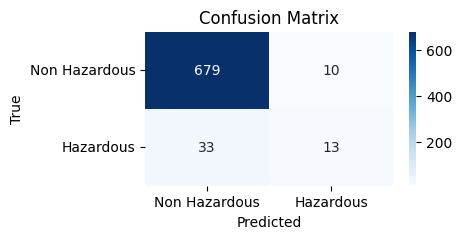

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Hazardous', 'Hazardous'], yticklabels=['Non Hazardous', 'Hazardous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Hyperparameter Tuning
Hyperparameter tuning is a critical step to improve the performance of the machine learning model, in this case Random Forest Classifier.
To perform hyperparameter tuning, we have selected RandomizedSearchCV to fine-tune the hyperparameters of the model. <br/>
The goal is to identify the best combinations of hyperparameters that yeild optimal performance of the model on the test data.

In [44]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 5)]

# number of features to consider at every split
max_features = ['log2','sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree
bootstrap = [True, False]


In [45]:
parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(parameter_grid)

{'n_estimators': [100, 575, 1050, 1525, 2000], 'max_depth': [10, 35, 60, 85, 110, None], 'max_features': ['log2', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


### Random search of parameters, using 3 fold cross validation with 10 iterations

In [46]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions= parameter_grid, n_iter=10, cv=3, verbose=0, random_state=1, n_jobs=4)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=0),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 575, 1050, 1525,
                                                         2000]},
                   random_state=1)

**Best Hyperparameters:**
After running RandomizedSearchCV with 10 iterations, the best set of combinations was found:


In [47]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 35,
 'bootstrap': True}

**Model Evaluation:**
After hyperparameter tuning, we evaluated the model's performance on both the training and test datasets.

In [48]:
print(f"Train Accuracy: {rf_random.score(X_train, y_train)}")
print(f"Test Accuracy: {rf_random.score(X_test, y_test)}")

Train Accuracy: 0.9688398124338224
Test Accuracy: 0.9469387755102041


In [49]:
y_pred_random = rf_random.best_estimator_.predict(X_test)

### Classification Report 

In [50]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       689
           1       0.73      0.24      0.36        46

    accuracy                           0.95       735
   macro avg       0.84      0.62      0.67       735
weighted avg       0.94      0.95      0.93       735



The classification report of the Random Forest Model with the best parameters shows us that the model has significantly improved.
Class 0 (Non-hazardous): High precision (0.95), recall (0.99), and F1-score (0.97).
Class 1 (Hazardous): Lower precision (0.73) and recall (0.24), indicating improvement but still finding difficulties in identifying hazardous objects due to class imbalance.

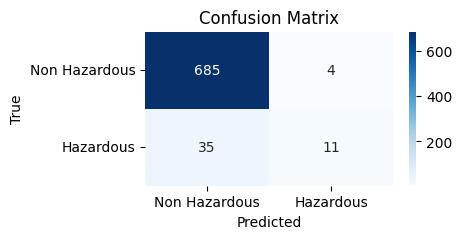

In [51]:
cm = confusion_matrix(y_test, y_pred_random)

plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Hazardous', 'Hazardous'], yticklabels=['Non Hazardous', 'Hazardous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Conclusion:
In this project, we have worked through the following steps:<br/>
1. Data Extraction and preprocessing: The dataset was extracted using NASA API and the data was extracted for the duration of one year. The data extracted in JSON format, thus it was then converted into pandas dataframe.<br/>
2. Exploratory Data Analysis: We visualized the relationships between various features, identifying key patterns and distributions.
3. Modelling: We trained a Random Forest Classifier and evaluated it using cross-validation.<br/>
4. Hyperparameter Tuning: We used RandomizedSearchCV to find the optimal combination of hyperparameters to increase the efficiency and the performance of the model.<br/>
5. Evaluation: Despite a high accuracy score of 94.6% on test dataset, the model struggles to identify the hazardous objects. This is probably due to imbalance in the dataset, as the number of hazardous NEOs is much smaller than the number of non hazardous NEOs.<br/>

The primary objective of this project was to analyze and model the behaviour of Near-Earth Objects to understand their characteristics and potential threat. The following insights can be made about the NEOs:<br/>

* Analysis of relationship between the key features: <br/>
Through detailed analysis, we examined the relationships between the key features. The correlation analysis we performed showed how these features are related to one another. The notable observations are the **negative correlation** between absolute magnitude and the diameters of the NEOs, along with **moderate positive correlation** between size and relative velocity, which implies that larger NEOs move faster.

* Identifying clusters or patterns:<br/>
We discovered patterns and clusters in the dataset when performed EDA. The patters were seen in size and promixity to Earth. Most of the NEOs have small sizes and travel at slower speeds, while the fewer larger NEOs have high velocities. The `Miss_distance` shows that most of the NEOs come closer to Earth and only a few went far beyond. This observation provides a deeper insight into the behaviour of NEOs.

* Predictive model for Hazardous NEOs:<br/>
The predictive model chosen here is Random Forest classifier. The model achieved an accuracy of 94.6% after hyperparameter tuning, indicating strong performance. Although, the shortcoming of the model was the low accuracy for predicting the Hazardous events (class 1) as the data was highly imbalanced. 

Overall, the project answers the question that we set at the start and meets its objectives by analyzing the relationships between NEO characteristics, identifying patterns in the data, and building a predictive model to classify potentially hazardous NEOs. Although the predictive model has some shortcomings, further research and fine tuning of the predictive model can help in better understanding and preventing the risk posed by NEOs.

### For Future Work:
One promising approach for future work is incorporating Temporal Analysis into the study of NEOs. This could involve tracking the orbital changes over time of NEOs and predicting long-term hazardous NEOs based on their changing trajectories. By adding a time-series component, we can move beyond static snapshots of an NEO’s characteristics and consider how its orbit and velocity change over time, which is crucial for risk assessment.